In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
data=pd.read_csv('Chennai_Zomato_Data_updated.csv')

In [3]:
# know about the columns
data.columns

Index(['Unnamed: 0', 'Zomato URL', 'Name of Restaurant', 'Address', 'Location',
       'Cuisine', 'Top Dishes', 'Price for 2', 'Ratings', 'No of Votes'],
      dtype='object')

In [4]:
#know about categorical features in the the data frame
data.describe(include=np.object)
# so Zomato URL	Name of Restaurant	Address	Location	Cuisine	Top Dishes	Ratings	No of Votes are the categorical features in the data frame

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Ratings,No of Votes
count,8505,8505,8505,8505,8505,8505,8505,8505
unique,8334,7890,7780,271,2168,1492,30,703
top,https://www.zomato.com/chennai/svps-101-dosa-s...,Sri Krishna Bhavan,Delivery Only,Porur,South Indian,Invalid,invalid,invalid
freq,2,13,90,293,752,6871,3034,3037


In [5]:
# know about the numerical features in the data frame
data.describe(exclude=np.object)
# fromt this Unnamed: 0	Price for 2 are the numerical features in the data frame

,Unnamed: 0,Price for 2
count,8505.000000,8505.000000
mean,4252.000000,419.582598
std,2455.326353,412.945335
min,0.000000,40.000000
25%,2126.000000,200.000000
50%,4252.000000,300.000000
75%,6378.000000,450.000000
max,8504.000000,5500.000000


In [24]:
c_list = [feature for feature in data.columns if data[feature].dtype == 'O']
c_list

['Zomato URL',
 'Name of Restaurant',
 'Address',
 'Location',
 'Cuisine',
 'Top Dishes']

In [6]:
# to see hwo many null values are there
data.isnull().sum()

Unnamed: 0            0
Zomato URL            0
Name of Restaurant    0
Address               0
Location              0
Cuisine               0
Top Dishes            0
Price for 2           0
Ratings               0
No of Votes           0
dtype: int64

In [7]:
# even though Ratings and No of votes are shown as the categorical features, they are basically numerical features.
# so we have to change the "invalid" value in to some other value
# if we are not change 'invalid' valid there will be trouble in data analysis so we are going to change those into np.NaN
def invalid(feature_name):
    data[feature_name]=data[feature_name].apply(lambda x:np.NaN if x=='invalid' else float(x))

In [8]:
invalid_features=['Ratings','No of Votes']
for i in invalid_features:
    invalid(i)

In [9]:
# to see how many features has null values
data.isnull().sum()
# from this only Ratings and No of Votes has null values since we changed the 'invalid' into null values

Unnamed: 0               0
Zomato URL               0
Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Ratings               3034
No of Votes           3037
dtype: int64

In [10]:
# from the description of categorical features 'Zomato URL', 'Name of Restaurant', 'Address' has nearly all the values as unique values.
# since this data set is not a regression of classification problem we can't relate these features (mostly unique values).
# Location feature has 271 unqiue values so each location has 1 or more than 1 restaurants.
# we are going to see which location has highest and which location has lowest number of restaurants in their respective location.
loc=data[['Location','Name of Restaurant']].groupby(['Location']).count()
loc=loc.reset_index()
loc.sort_values(by='Name of Restaurant',ascending=False)
# from this 'Porur' has most number of restaurant in Zomato and 60 other location has only one restaurant in Zomato

,Location,Name of Restaurant
190,Porur,293
261,Velachery,255
222,T. Nagar,229
15,Anna Nagar East,227
10,Ambattur,212
...,...,...
102,"Hotel Royal Regency, Vepery",1
64,Grande Bay Resort,1
238,"The Pride Hotel, Kilpauk",1
65,"Green Coconut Resort, Kanchipuram District",1


(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text xticklabel objects>)

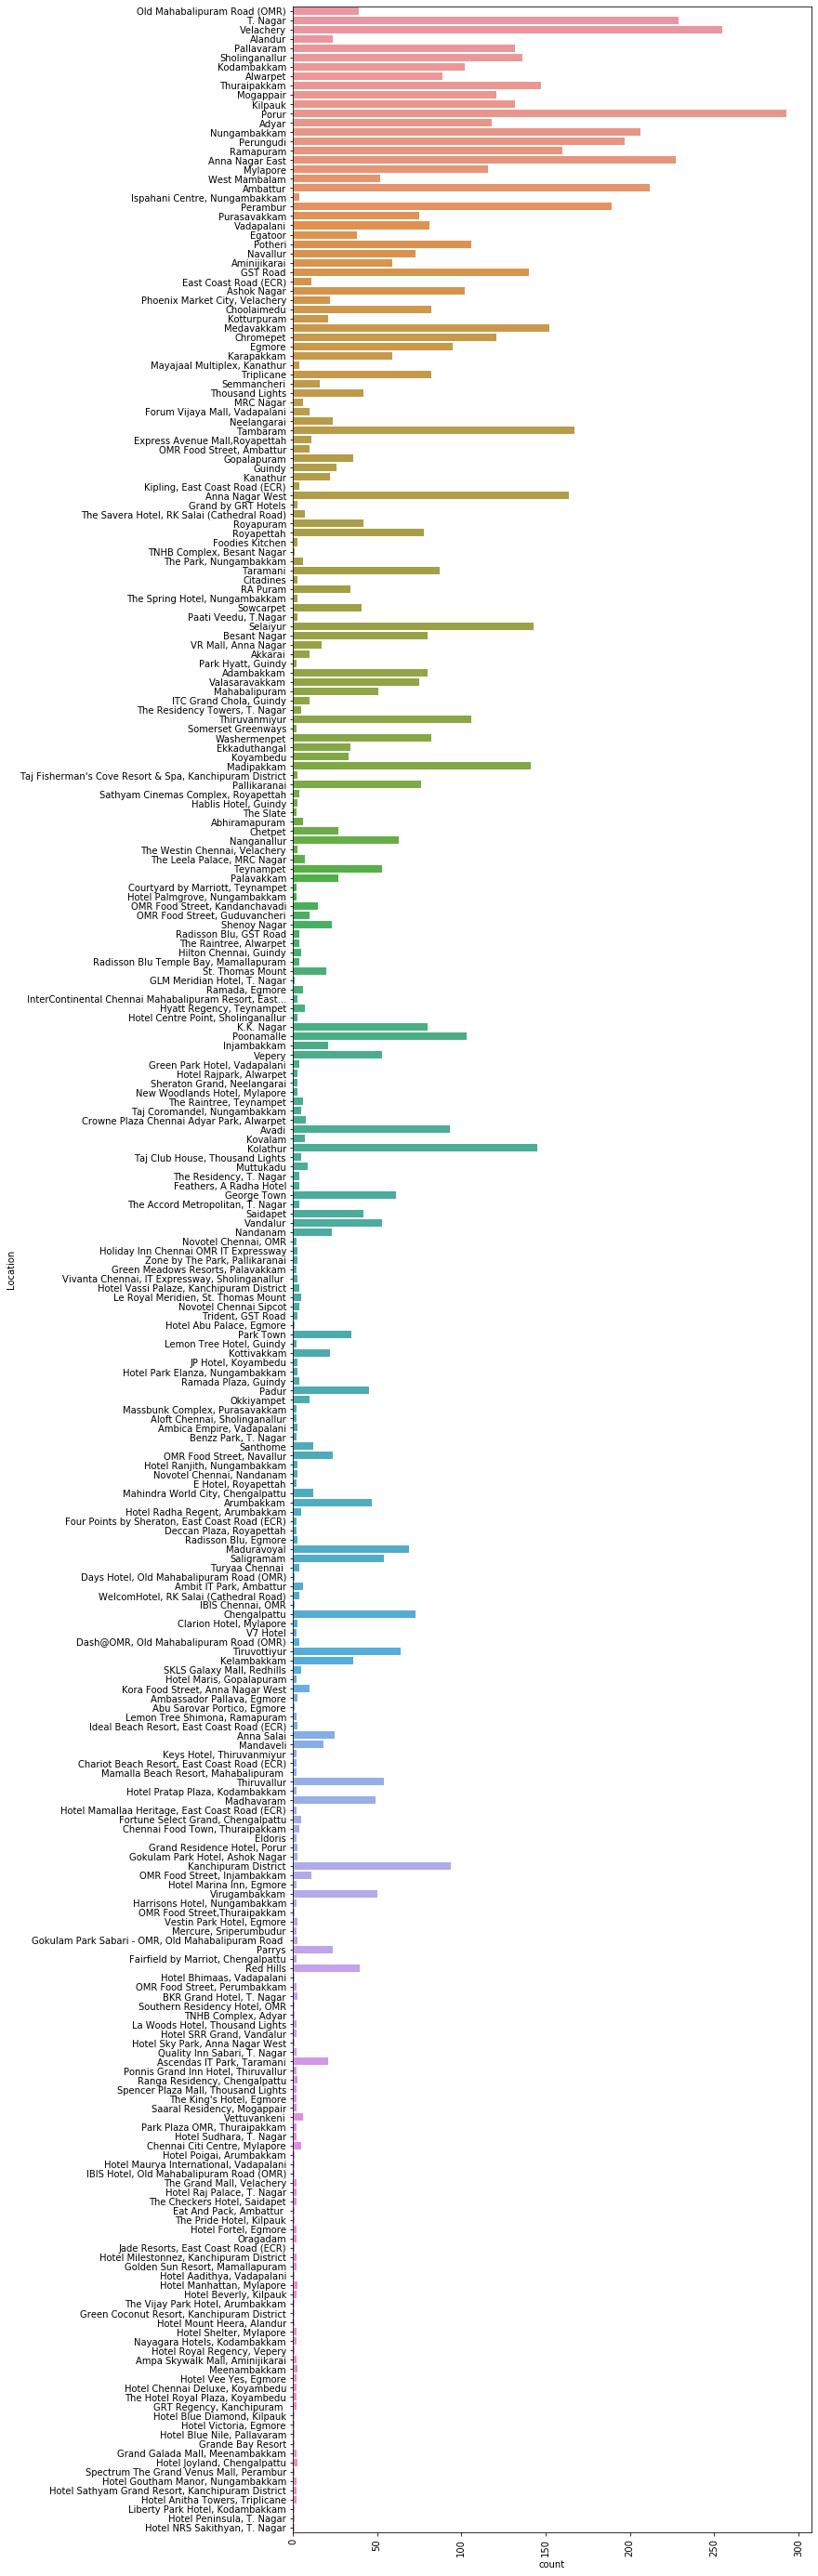

In [11]:
# its better understanding if we done this by visualization.
plt.subplots(figsize=[10,50])
sns.countplot(y='Location',data=data)
plt.xticks(rotation=90)

In [12]:
# there are 2168 unique orders in cuisine feature so we are going to see some top ordered cuisines
cs=data[['Cuisine','Unnamed: 0']].groupby('Cuisine').count()
cs=cs.reset_index()
cs=cs[cs['Unnamed: 0']>np.median(cs['Unnamed: 0'].unique())].sort_values(by='Unnamed: 0',ascending=False)
# from this we can see that South indian cuisine has ordered by the most of the customers

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text xticklabel objects>)

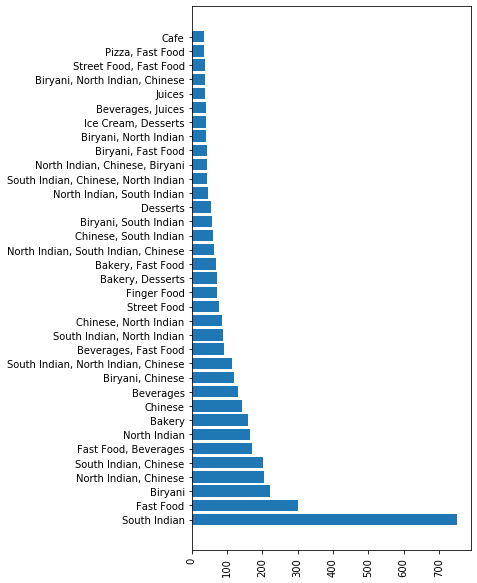

In [13]:
# like location feature it is better to plot in chart
plt.subplots(figsize=[5,10])
plt.barh(width=cs['Unnamed: 0'],y=cs['Cuisine'])
plt.xticks(rotation=90)

In [14]:
# there are 1492 unqiue values in Top Dishes features.
# most of them are ordered 1 or 2 times so we are going to take the Dish type which ordered more than 2 times.
td=data[['Top Dishes','Unnamed: 0']].groupby('Top Dishes').count()
td=td.reset_index()
td=td[td['Unnamed: 0']>2].sort_values(by='Unnamed: 0',ascending=False)
# we can't change 'invalid' in this feature. because it can be any type of Dish. so we are going to change it as others
td['Top Dishes']=td['Top Dishes'].apply(lambda x:'others' if x=='Invalid' else x)
# from this we can see most of the people ordered biryani

<BarContainer object of 22 artists>

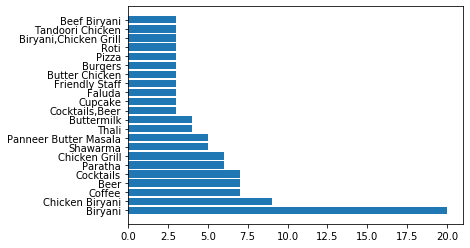

In [15]:
#plt.subplot(figsize=[5,10])
plt.barh(width=td['Unnamed: 0'][1:],y=td['Top Dishes'][1:])

In [16]:
# price for 2 feature has 61 unique values so most of the food items has same rate.
pf2=data[['Price for 2','Unnamed: 0']].groupby('Price for 2').count()
pf2=pf2.reset_index()
pf2.sort_values(by='Unnamed: 0',ascending=False)
# from this 300INR has most ordered food items

,Price for 2,Unnamed: 0
9,300.0,1461
7,200.0,1406
8,250.0,921
13,400.0,919
15,500.0,654
...,...,...
6,160.0,1
56,4200.0,1
58,4800.0,1
2,60.0,1


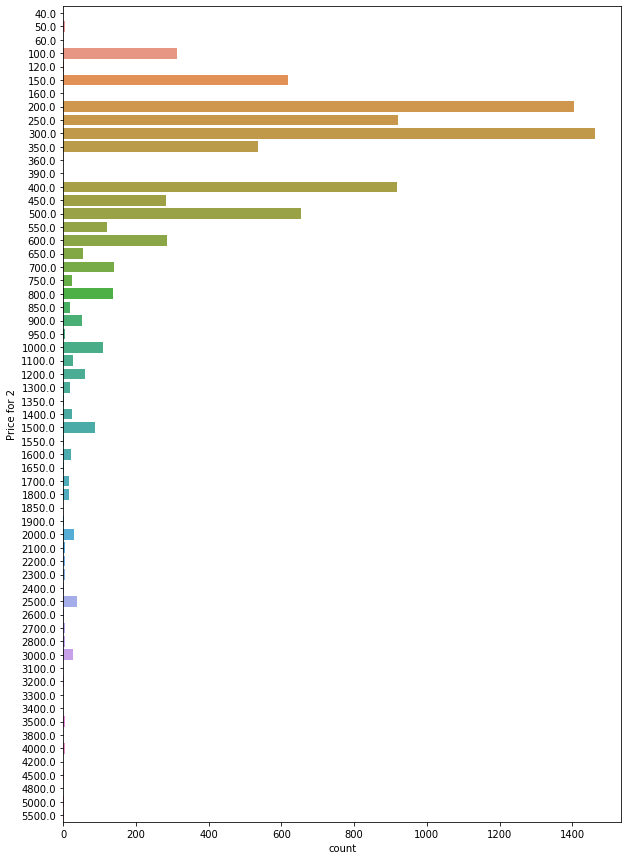

In [17]:
f,ax=plt.subplots(figsize=[10,15])
sns.countplot(y='Price for 2',data=data)

In [18]:
# then we can know which rating as given by customers
data[['Ratings','Unnamed: 0']].groupby('Ratings').count()

,Unnamed: 0
Ratings,
2.1,2
2.2,3
2.3,4
2.4,11
2.5,19
2.6,34
2.7,56
2.8,121
2.9,222


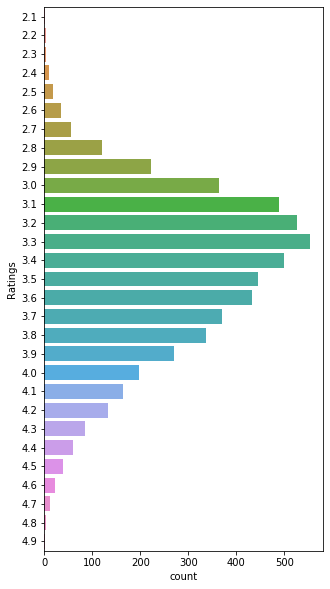

In [19]:
plt.subplots(figsize=[5,10])
sns.countplot(y='Ratings',data=data)

In [40]:
# from the description we knew the 'Ratings' and 'No of Votes' has relations. so multiple ratings has more votes
rating_votes=data[['Ratings','No of Votes']].groupby('Ratings').sum()
rating_votes=rating_votes.reset_index()
rating_votes

,Ratings,No of Votes
0,2.1,882.0
1,2.2,961.0
2,2.3,409.0
3,2.4,1515.0
4,2.5,2426.0
5,2.6,2120.0
6,2.7,3159.0
7,2.8,5949.0
8,2.9,7622.0
9,3.0,7914.0


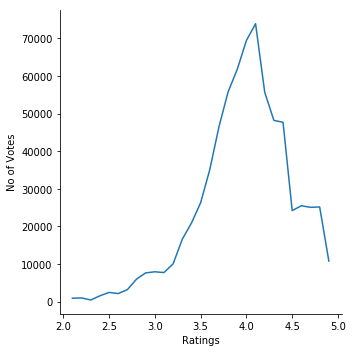

In [42]:
sns.relplot(x='Ratings',y='No of Votes',data=rating_votes,kind='line')

(array([0., 1., 2., 3., 4., 5., 6.]), <a list of 7 Text xticklabel objects>)

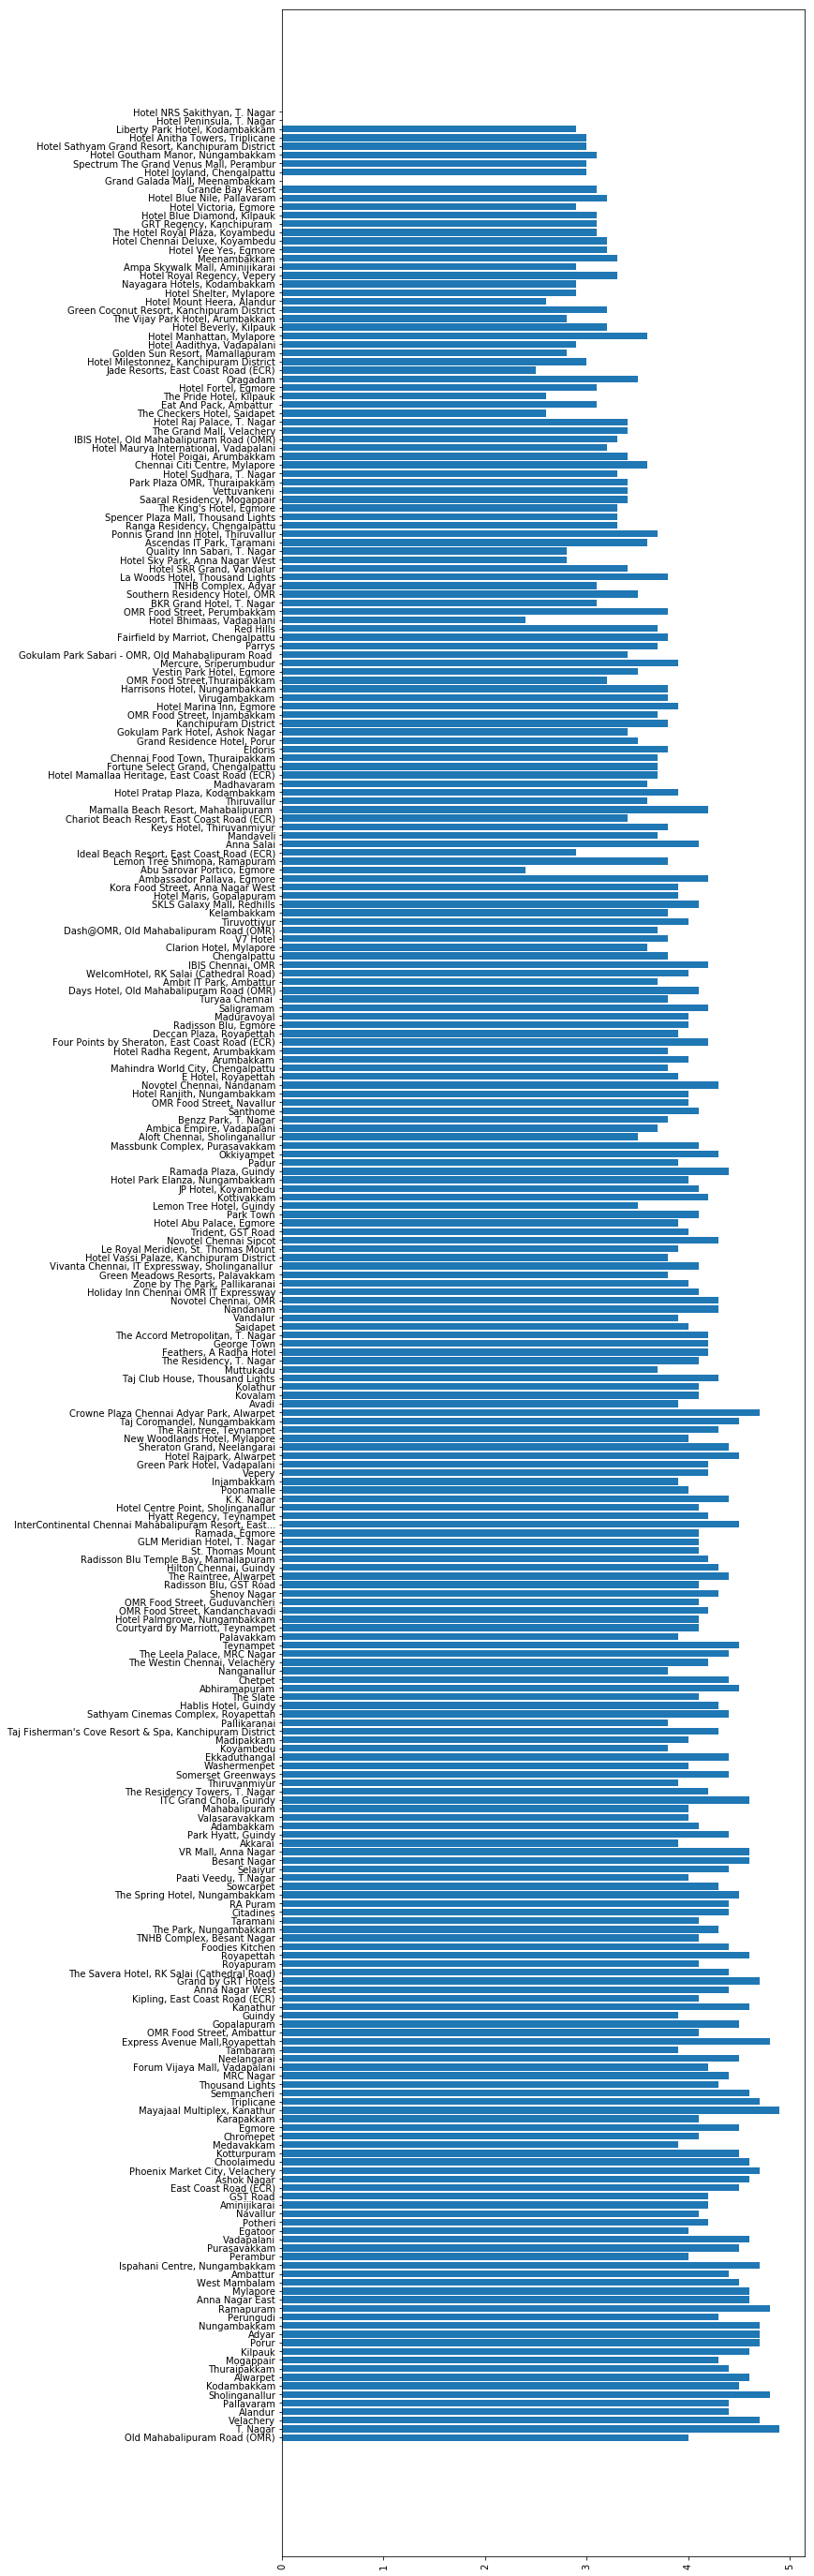

In [44]:
# sometimes some areas has high class restaurants so they have high ratings. so we can relate Location and ratings.
# based on this we can see which location restaurant got high ratings
f,ax=plt.subplots(figsize=(10,50))
plt.barh(width=data['Ratings'],y=data['Location'])
plt.xticks(rotation=90)

<BarContainer object of 8505 artists>

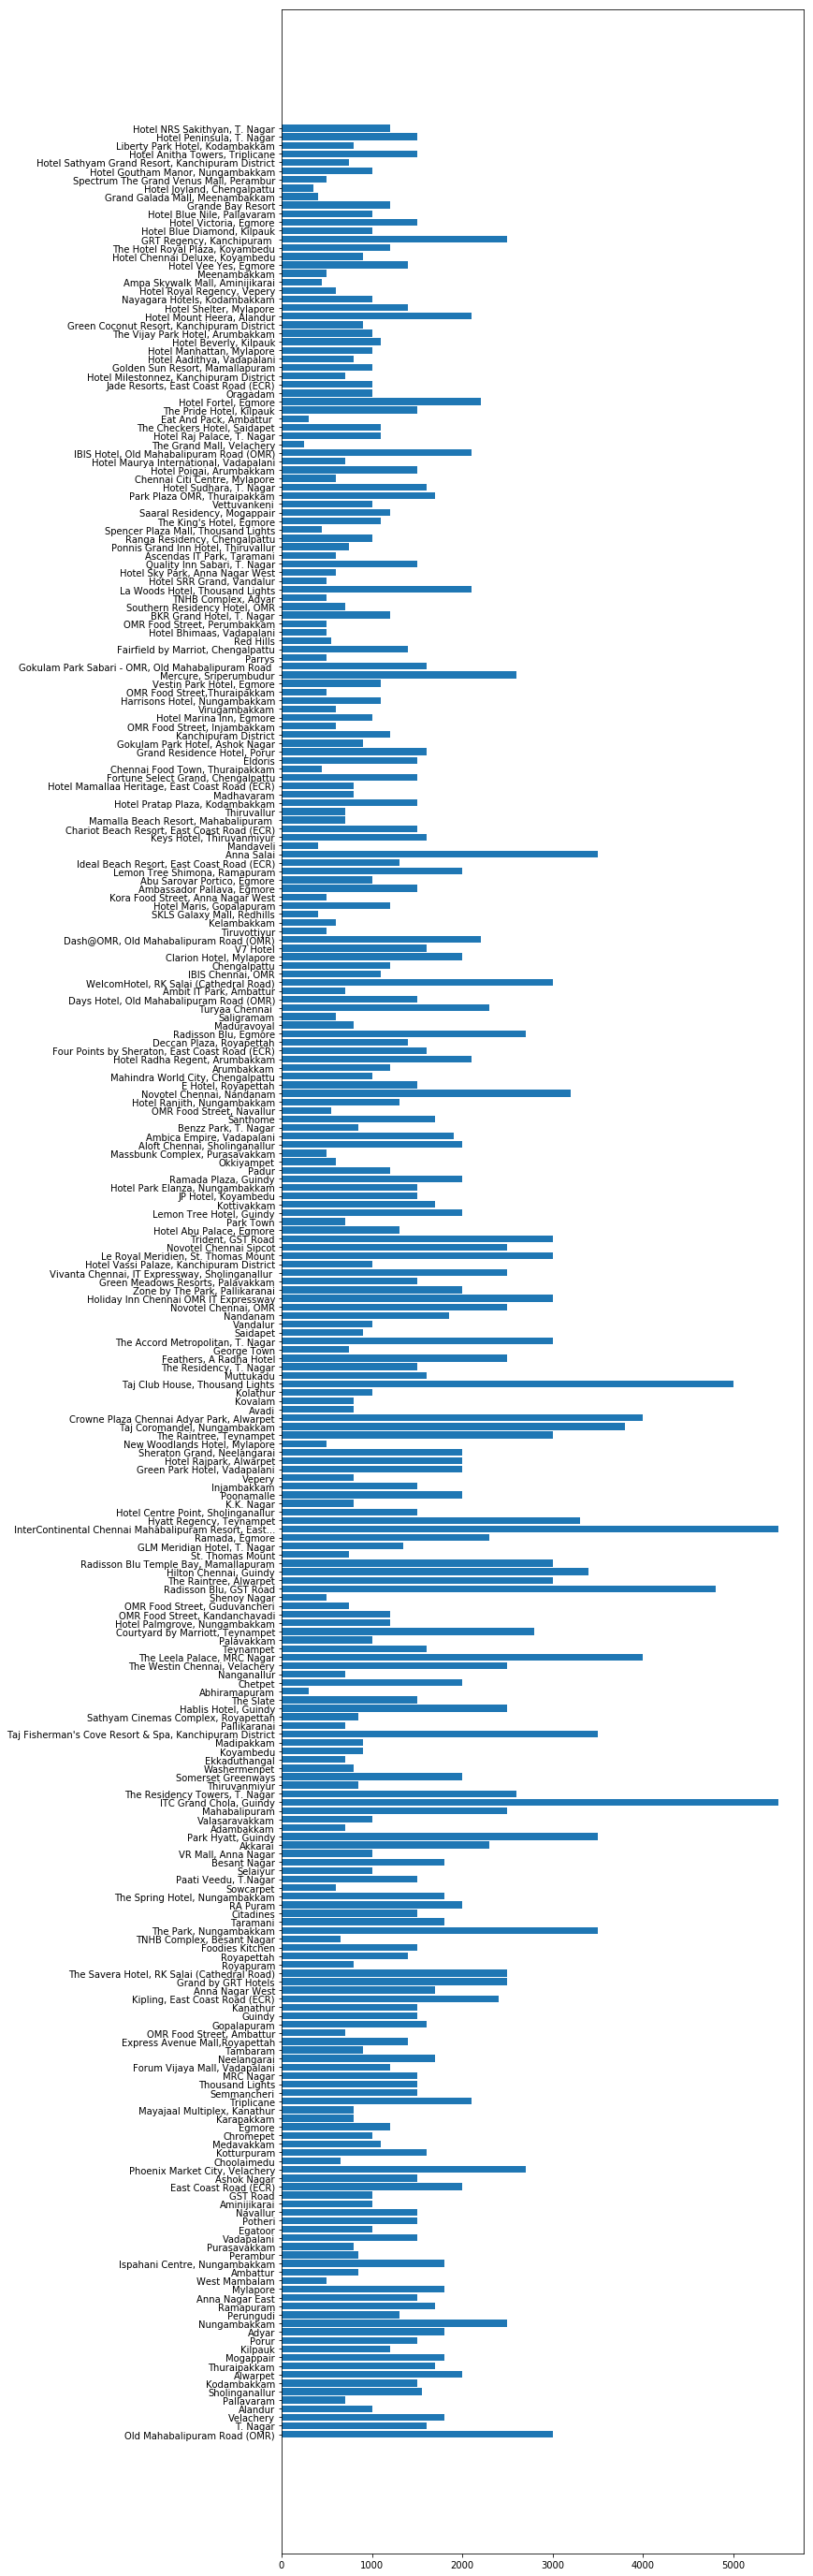

In [45]:
# price rate of food also based on the location. so we can relate location and rate
#from this we can see which restaurant is most expensive
plt.subplots(figsize=(10,50))
plt.barh(width=data['Price for 2'],y=data['Location'])
# from this we can see mahabalipuram resort and Guindy grand chola restaurant is most expensive